![QuantConnect Logo](https://cdn.quantconnect.com/web/i/logo-small.png)
Welcome to The QuantConnect Research Page!

Refer to this page for documentation https://www.quantconnect.com/docs#Introduction-to-Jupyter

Contribute to this template file https://github.com/QuantConnect/Lean/blob/master/Jupyter/BasicQuantBookTemplate.ipynb

In [1]:
%matplotlib inline
# Imports
from clr import AddReference
AddReference("System")
AddReference("QuantConnect.Common")
AddReference("QuantConnect.Jupyter")
AddReference("QuantConnect.Indicators")
from System import *
from QuantConnect import *
from QuantConnect.Data.Market import TradeBar, QuoteBar
from QuantConnect.Jupyter import *
from QuantConnect.Indicators import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create an instance
qb = QuantBook()

In [2]:
qb.AddEquity("SPY")
qb.AddEquity("VXX")

In [3]:
symbols = ["SPY","VXX"]
data = {}
for syl in symbols:
    qb.AddEquity(syl)
    data[syl] = qb.History(syl, datetime(2014,1,1), datetime.now(), Resolution.Daily).loc[syl]['close']
    data[syl].index = data[syl].index.date
#     data[syl].plot(label=syl)
# plt.legend()
# plt.ylabel('Adjusted Price')
# plt.figure(figsize =(15,7))
# for syl in symbols:    
#     (1+data[syl].pct_change()).cumprod().plot(label=syl)
# plt.legend()
# plt.ylabel('Cumulative Return')

In [4]:
price = pd.DataFrame(data, columns=data.keys())

In [5]:
day=len(data["SPY"])
ema = qb.Indicator(ExponentialMovingAverage(30), "VXX", day, Resolution.Daily)
ema.columns = ['EMA']

In [6]:
df = pd.concat([ema,price], axis=1, join='inner')

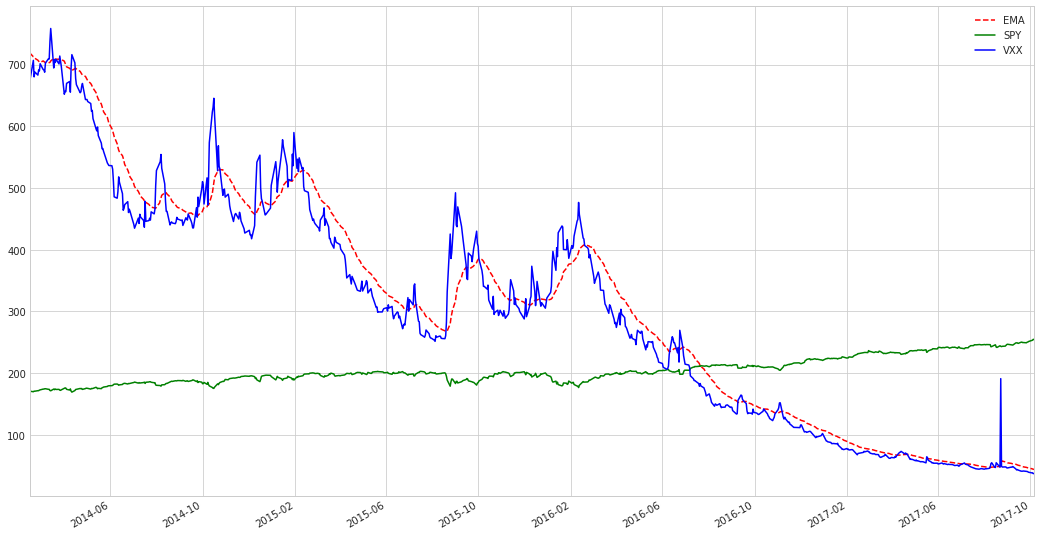

In [7]:
plt.style.use('seaborn-whitegrid')
df.plot(figsize=(18,10),style=['r--','g','b'])

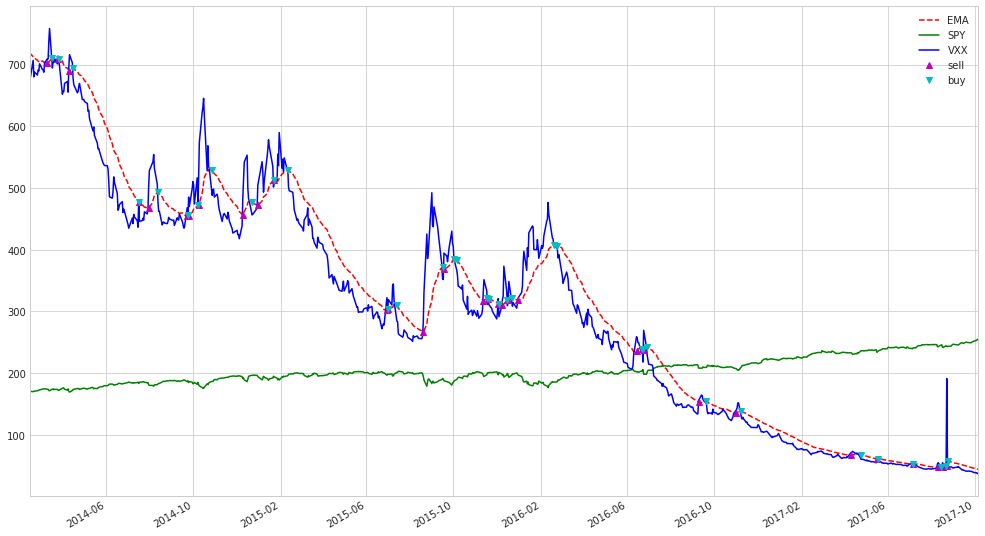

In [8]:
df['sell'] = df['EMA'][(df['VXX'] > df['EMA']) & (df['VXX'].shift(1) < df['EMA'])]                      
df['buy'] = df['EMA'][(df['VXX'] < df['EMA']) & (df['VXX'].shift(1) > df['EMA'])]                            
df.plot(figsize =(17,10), style=['r--', 'g', 'b', 'm^','cv'])                                             

In [9]:
signal = []
for i in range(len(df)):
    if not np.isnan(df['buy'][i]):
        signal.append(1)
    elif not np.isnan(df['sell'][i]):
        signal.append(0)
    else:
        signal.append(np.nan)
   

In [10]:
df['signal'] = signal

In [11]:
df = df.fillna(method='ffill')
df['sell'] = df['EMA'][(df['VXX'] > df['EMA']) & (df['VXX'].shift(1) < df['EMA'])]                      
df['buy'] = df['EMA'][(df['VXX'] < df['EMA']) & (df['VXX'].shift(1) > df['EMA'])]     

In [12]:
# SPY_return = np.log(df['SPY']) - np.log(df['SPY'].shift(1))
# cum_return = (np.exp(SPY_return)*(df['signal'].shift(1))).cumsum()

In [13]:
SPY_return = df['SPY'].pct_change()
cum_return = ((SPY_return)*df['signal'].shift(1)).cumsum()

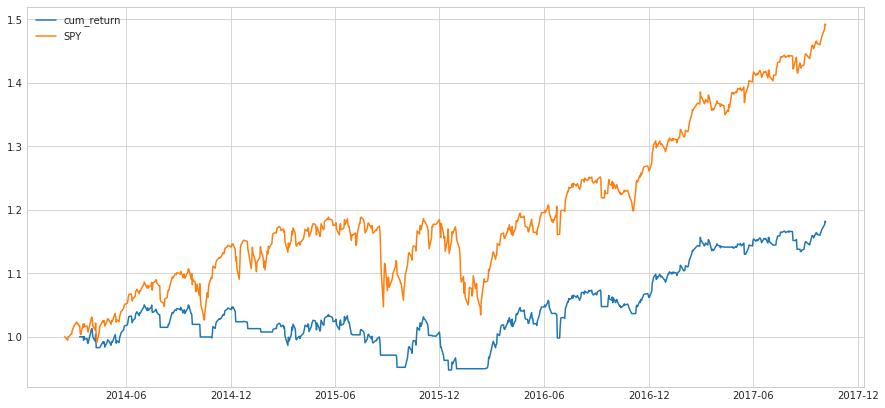

In [14]:
plt.figure(figsize =(15,7))
plt.plot(df.index, cum_return+1,label ='cum_return')
plt.plot(df.index, df['SPY']/df['SPY'][0],label ='SPY')
plt.legend()